# 泊松分布（Poisson Distribution）
***
## 定义
现实生活多数服从于泊松分布。   
假设你在一个呼叫中心工作，一天里你大概会接到多少个电话？它可以是任何一个数字.现在，呼叫中心一天的呼叫总数可以用泊松分布来建模.这里有一些例子：
- 医院在一天内录制的紧急电话的数量。
- 某个地区在1天内报告的失窃的数量.
- 在一小时内抵达沙龙的客户人数。
- 在特定城市上报的自杀人数。
- 书中每一页打印错误的数星。泊松分布适用于在随机时间和空间上发生事件的情况，其中，我们只关注事件发生的次数.   

当以下假设有效时，则称为泊松分布
- 任何一个成功的事件都不应该影响另一个成功的事件。
- 在短时间内成功的概率必须等于在更长的间内成功的概率e
- 时间间隔很小时,在给间隔时间内成功的概率趋向于零。
     
泊松分布中使用了这些符号:   
- $\lambda$是事件发生的速率
- t是时问间隔的长
- X是该时间间隔内的事件数，
- 其中，X称为泊松随机变量.X的概率分布称为泊松分布，
- 令$\mu$表求长度为t的间隔中的平均事件数。那么，n =$\lambda$*t    
     
例如说一个医院中，每个病人来看病都是随机并独立的概率，则该医院一天（或者其他特定时间段,一小时，一周等等）接纳的病人总数可以看做是一个服从 poisson分布的随机变量。但是为什么可以这样处理呢？通俗定义：假定一个事件在一段时间内随机发生，且符合以下条件：
* （1）将该时间段无限分隔成若干个小的时间段，在这个接近于零的小时间段里，该事件发生一次的概率与这个极小时间段的长度成正比。
* （2）在没一个极小时间段内，该事件发生两次及以上的概率恒等于零。
* （3）该事件在不同的小时间段里，发生与否相互独立。

则该事件称为poission process。这个第二定义就更加利于大家理解了，回到医院的例子中，如果我们把一天分成24小时，或者24*60分钟，或者24*3600秒。时间分的越短，这个时间段里来病人的概率就越小（比如说医院在正午12点到正午12点又一毫杪之间来病人的概率是不是很接近于零）。条件一符合。另外，如果我们把时间分的很细很细，是不是同时来两个病人（或两个以上的病人）就是算不可能的事件？即使两个病人同时来，也总有一个人先迈步跨进医院大门吧。条件二也符合〉倒是条件3的要求比较苛刻，应用到实际例子中谈是说病人们来医院的概率必须是相互独立的，如果不是，则不能看做poisson分布。

## Definition
>The Poisson distribution [...] [is a discrete probability distribution] that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event.$ ^{[1]}$.

## Formula
The probability mass function of a Poisson distributed random variable is defined as:
$$ f(x|\lambda) = \frac{\lambda^{x}e^{-\lambda}}{x!}$$
where $\lambda$ denotes the mean of the distribution.    

已知平均每小时出生3个婴儿，请问你下一个小时，会出生几个？     
有可能一下子出生6个，也有可能一个都不出生，这是我们没法知道的。     
泊松分布就是描述某段时间内，时间具体的发生概率。    
$$ P(N(t)=n) = \frac{(\lambda t)^{n}e^{-\lambda t}}{n!}$$     
上面就是泊松分布的公式，等号的左边，P表示概率，N表示某种函数关系，t表示时间，n表示数量，1小时内出生3个婴儿的概率，就表示为P(N(1)=3),等号的右边，$\lambda$表示时间的频率。    
接下来2小时，一个婴儿都生不出来的概率是0.25%，基本不可能发生。   
$$ P(N(2)=0) = \frac{(3 * 2)^{0}e^{-3 * 2}}{0!} = 0.0025$$ 
同理，接下来一个小时，至少出生两个婴儿的概率是80%。计算方法类似：
$$ P(N(1)>=2) = 1 - P(N(1)=1) - P(N(1)=0) $$ 

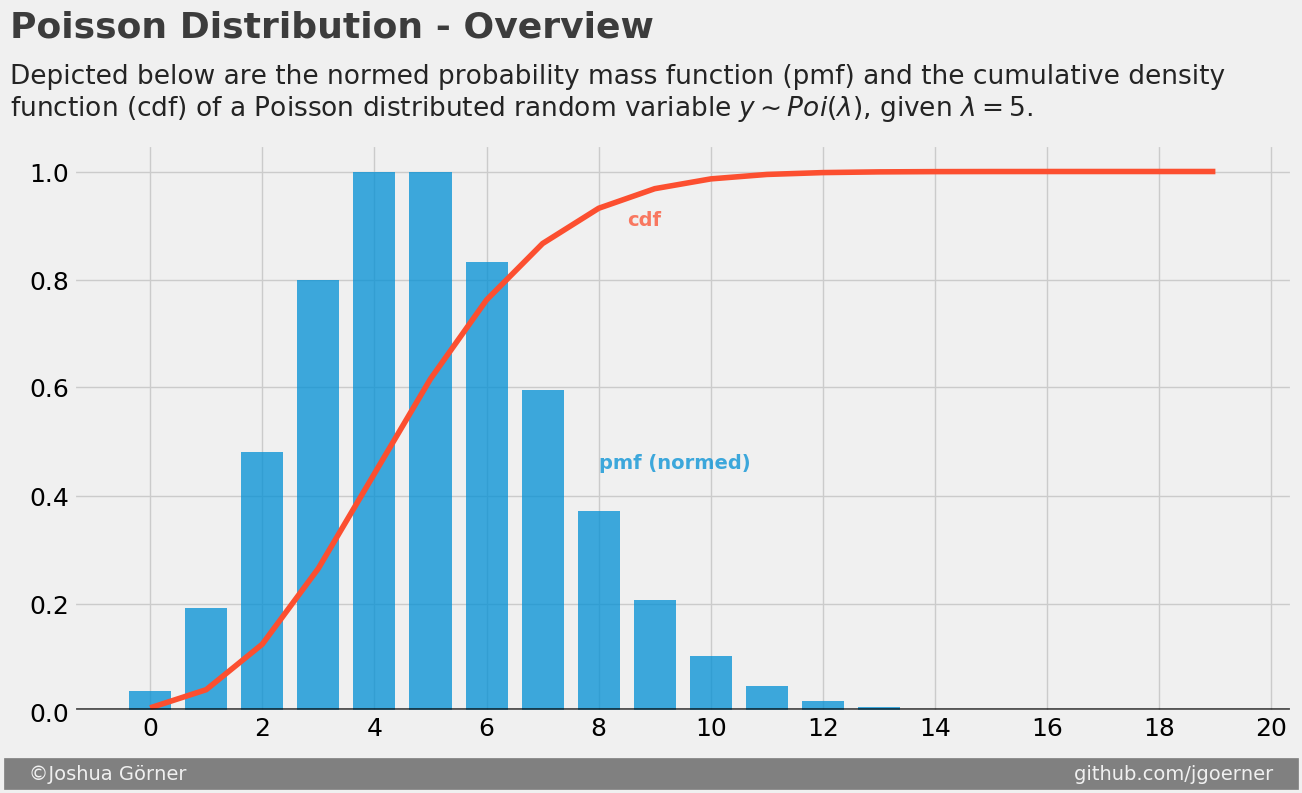

In [2]:
# %load ../src/poisson/01_general.py

***
## Parameters

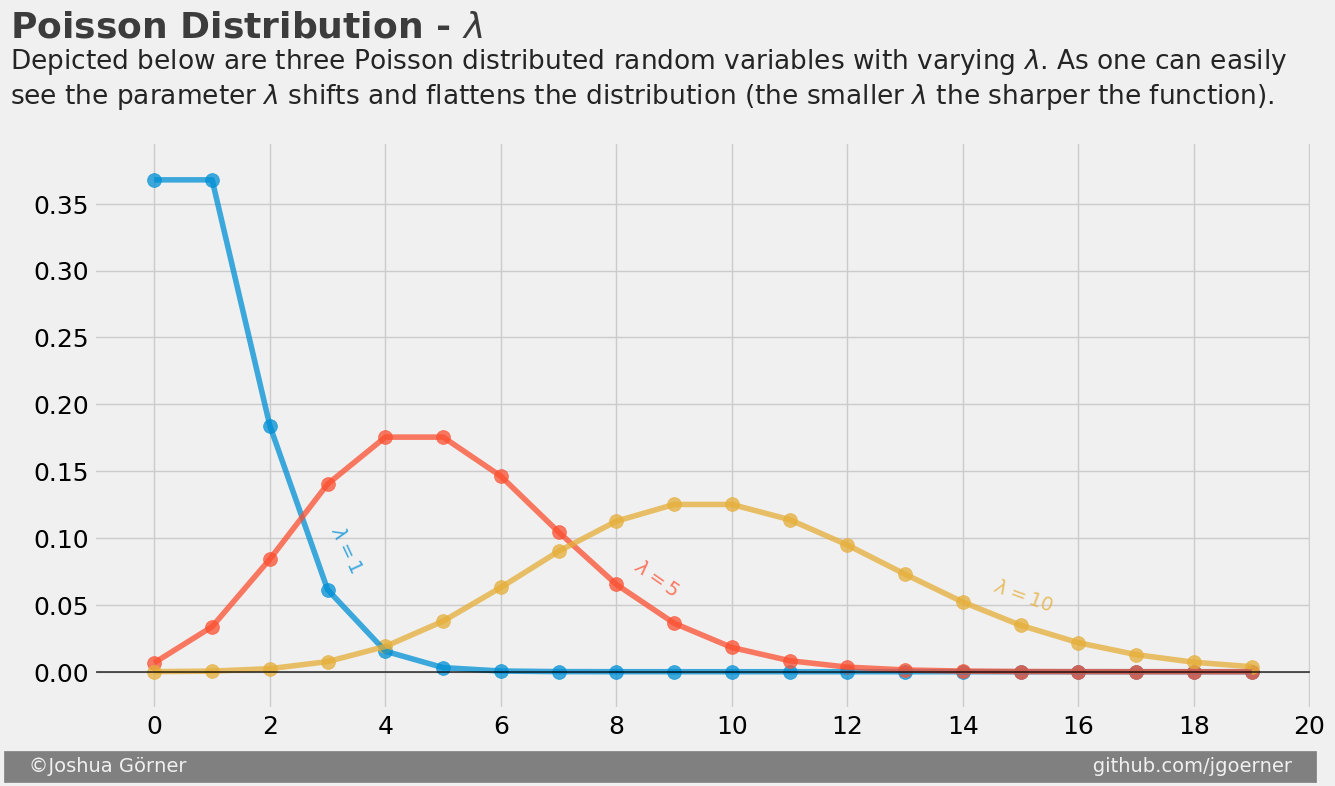

In [4]:
# %load ../src/poisson/02_lambda.py

*** 
## Implementation in Python
Multiple Python packages implement the Poisson distribution. One of those is the `stats.poisson` module from the `scipy` package. The following methods are only an excerpt. For a full list of features the [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) should be read.

### Random Variates
In order to generate a random sample from, the function `rvs` should be used. 

In [5]:
import numpy as np
from scipy.stats import poisson

# draw a single sample
np.random.seed(42)
print(poisson.rvs(mu=10), end="\n\n")

# draw 10 samples
print(poisson.rvs(mu=10, size=10), end="\n\n")

12



[ 6 11 14  7  8  9 11  8 10  7]




### Probability Mass Function
The probability mass function can be accessed via the `pmf` function (mass instead of density since the Poisson distribution is discrete). Like the `rvs` method, the `pdf` allows for adjusting the mean of the random variable:

pdf(X=1) = 0.03368973499542734

pdf(X=7) = 0.10444486295705395


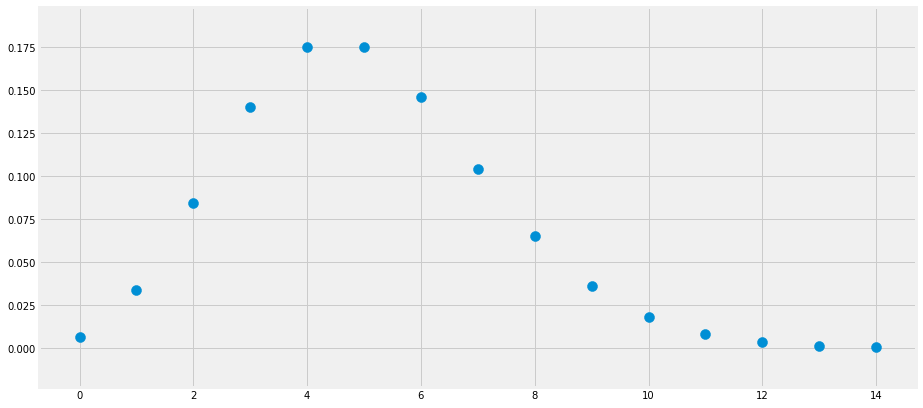

In [6]:
from scipy.stats import poisson

# additional imports for plotting purpose
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,7)

# likelihood of x and y
x = 1
y = 7
print("pdf(X=1) = {}\npdf(X=7) = {}".format(poisson.pmf(k=x, mu=5), poisson.pmf(k=y, mu=5)))

# continuous pdf for the plot
x_s = np.arange(15)
y_s = poisson.pmf(k=x_s, mu=5)
plt.scatter(x_s, y_s, s=100);

### Cumulative Probability Density Function
The cumulative probability density function is useful when a probability range has to be calculated. It can be accessed via the `cdf` function:

In [7]:
from scipy.stats import poisson

# probability of x less or equal 0.3
print("P(X <=3) = {}".format(poisson.cdf(k=3, mu=5)))

# probability of x in [-0.2, +0.2]
print("P(2 < X <= 8) = {}".format(poisson.cdf(k=8, mu=5) - poisson.cdf(k=2, mu=5)))

P(X <=3) = 0.2650259152973616

P(2 < X <= 8) = 0.8072543457950705


***
## Infering $\lambda$
Given a sample of datapoints it is often required to estimate the "true" parameters of the distribution. In the case of the Poisson distribution this estimation is quite simple. $\lambda$ can be derived by calculating the mean of the sample.

Estimated LAMBDA: 6.923


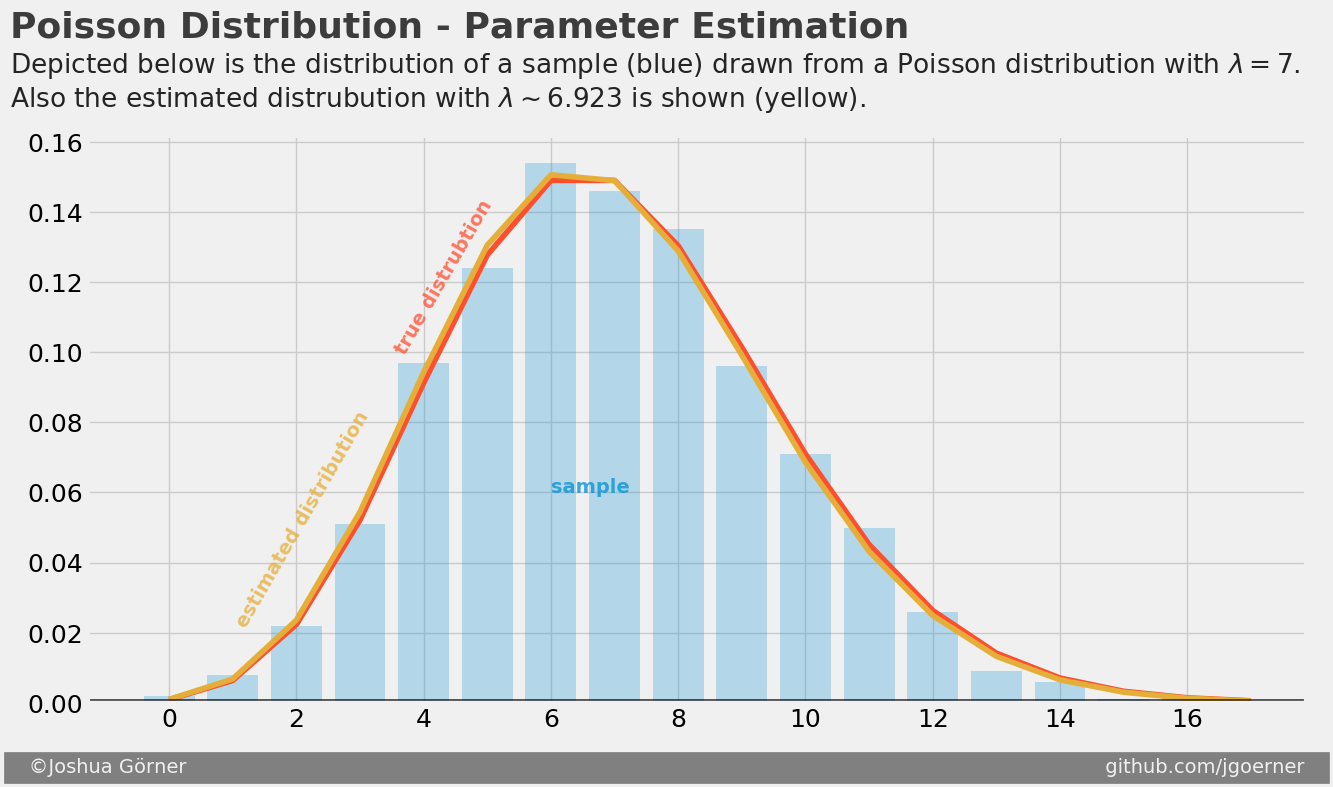

In [5]:
# %load ../src/poisson/03_estimation.py

## Infering $\lambda$ - MCMC
In addition to a "direct" inference, $\lambda$ can also be estimated using Markov chain Monte Carlo simulation - implemented in Python's [PyMC3](https://github.com/pymc-devs/pymc3).

100%|██████████| 50500/50500 [00:11<00:00, 4515.84it/s]


95% of sampled lambdas are between 6.764 and 7.086


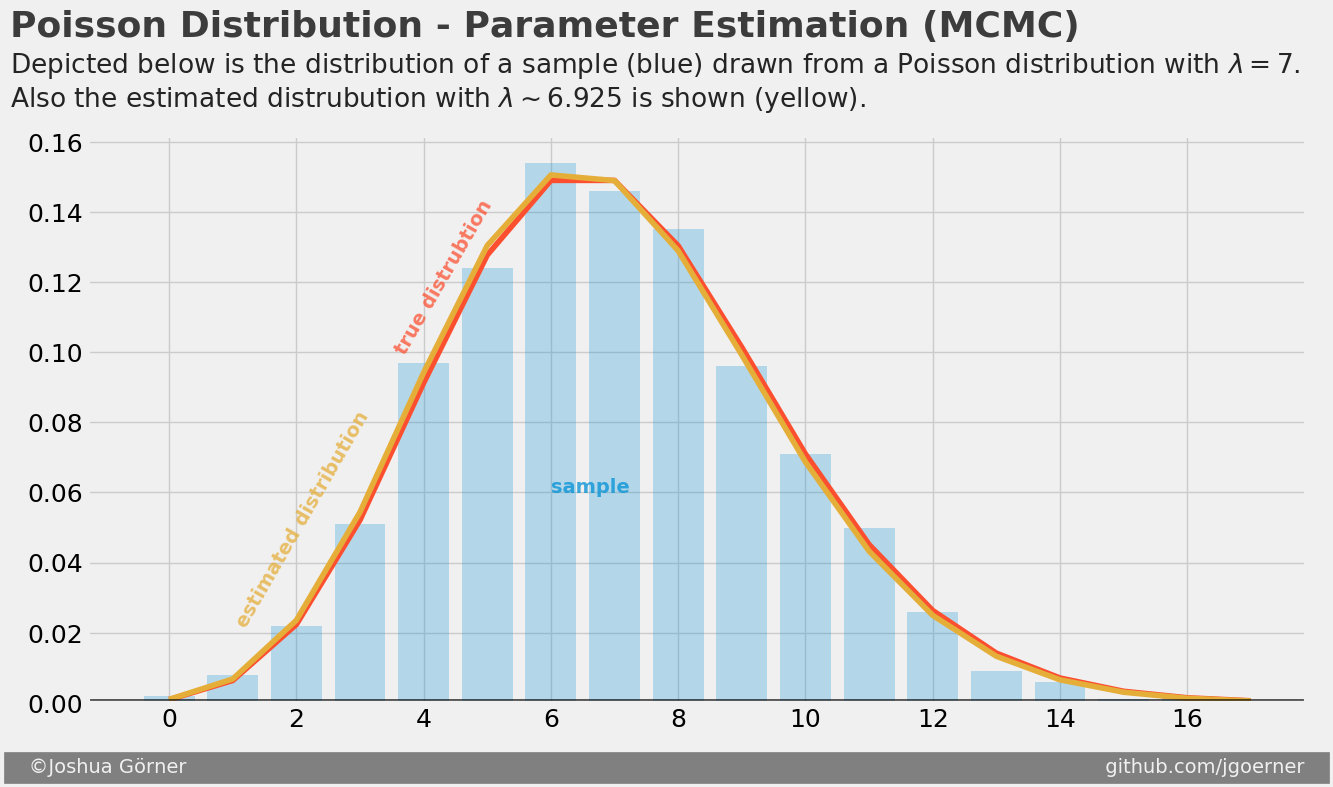

In [6]:
# %load ../src/poisson/04_mcmc_estimation.py

***
[1] - [Wikipedia. Poisson Distribution](https://en.wikipedia.org/wiki/Poisson_distribution)